# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [4]:
#Para facilitar a visualizacao dos dados, criei um novo Dataframe com as variaveis que é solictada nos exercicios:
sinasc_1 = sinasc_raw[['munResNome', 'IDADEMAE','IDADEPAI','PESO','ESCMAE','DTNASC', 'SEXO']].copy()
sinasc_1.head()

,munResNome,IDADEMAE,IDADEPAI,PESO,ESCMAE,DTNASC,SEXO
0,Alta Floresta D'Oeste,19,26.0,3685,8 a 11 anos,2019-02-19,Masculino
1,Alta Floresta D'Oeste,29,24.0,3055,8 a 11 anos,2019-02-21,Feminino
2,Alta Floresta D'Oeste,37,32.0,3460,8 a 11 anos,2019-02-25,Feminino
3,Alto Alegre dos Parecis,30,24.0,2982,12 anos ou mais,2019-03-20,Feminino
4,Alta Floresta D'Oeste,30,27.0,3310,8 a 11 anos,2019-03-23,Feminino


In [5]:
#Calculo da idade media das mãe e dos pais atraves do metodo groupby do Municipio e calculo atraves da função mean(media)
sinasc_1.groupby('munResNome')[['IDADEMAE', 'IDADEPAI']].mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [6]:
#Aqui podemos ver que existem dados referentes a 365 dias do ano, ou seja, o ano inteiro de 2019.
sinasc_1['DTNASC'].value_counts()

2019-04-10    116
2019-03-21    109
2019-09-25    108
2019-09-02    105
2019-12-04    104
             ... 
2019-12-25     44
2019-02-09     44
2019-07-28     44
2019-08-04     43
2019-11-03     40
Name: DTNASC, Length: 365, dtype: int64

In [7]:
#Criei um DataFrame filtrando apenas o conjunto de dados da data do meu aniversário (02/02)
sinasc_2 = sinasc_1[sinasc_1['DTNASC'] == '2019-02-02']
sinasc_2.head()

,munResNome,IDADEMAE,IDADEPAI,PESO,ESCMAE,DTNASC,SEXO
413,Ariquemes,29,NaN,2910,4 a 7 anos,2019-02-02,Masculino
1538,Espigão D'Oeste,22,35.0,3230,8 a 11 anos,2019-02-02,Feminino
1541,Cacoal,16,18.0,4095,8 a 11 anos,2019-02-02,Masculino
1542,Cacoal,17,NaN,2890,8 a 11 anos,2019-02-02,Feminino
2621,Nova Mamoré,36,NaN,2895,8 a 11 anos,2019-02-02,Feminino


In [8]:
#Criei o dataframe 'ESC_MAE' filtrando por faixa de escolaridade da mae, peso e sexo:
esc_mae = sinasc_2[['ESCMAE', 'PESO', 'SEXO']]
esc_mae.head()

,ESCMAE,PESO,SEXO
413,4 a 7 anos,2910,Masculino
1538,8 a 11 anos,3230,Feminino
1541,8 a 11 anos,4095,Masculino
1542,8 a 11 anos,2890,Feminino
2621,8 a 11 anos,2895,Feminino


In [9]:
#Media do peso do bebe agrupado conforme a faixa de escolaridade da mãe:
esc_mae.groupby('ESCMAE')['PESO'].mean()

ESCMAE
1 a 3 anos         4060.000000
12 anos ou mais    2873.470588
4 a 7 anos         3404.090909
8 a 11 anos        3202.384615
Name: PESO, dtype: float64

In [10]:
#Quantidade de dados por sexo (Masculino e Feminino):
esc_mae.SEXO.value_counts()

Masculino    35
Feminino     33
Name: SEXO, dtype: int64

In [11]:
#Atraves do metodo groupby e Unstack podemos extrair dados da media de peso por sexo e por faixa de escolaridade:
esc_mae.groupby(['ESCMAE', 'SEXO'])['PESO'].mean().unstack()

SEXO,Feminino,Masculino
ESCMAE,,
1 a 3 anos,NaN,4060.000000
12 anos ou mais,2770.000000,2929.909091
4 a 7 anos,3286.666667,3545.000000
8 a 11 anos,3074.047619,3352.111111


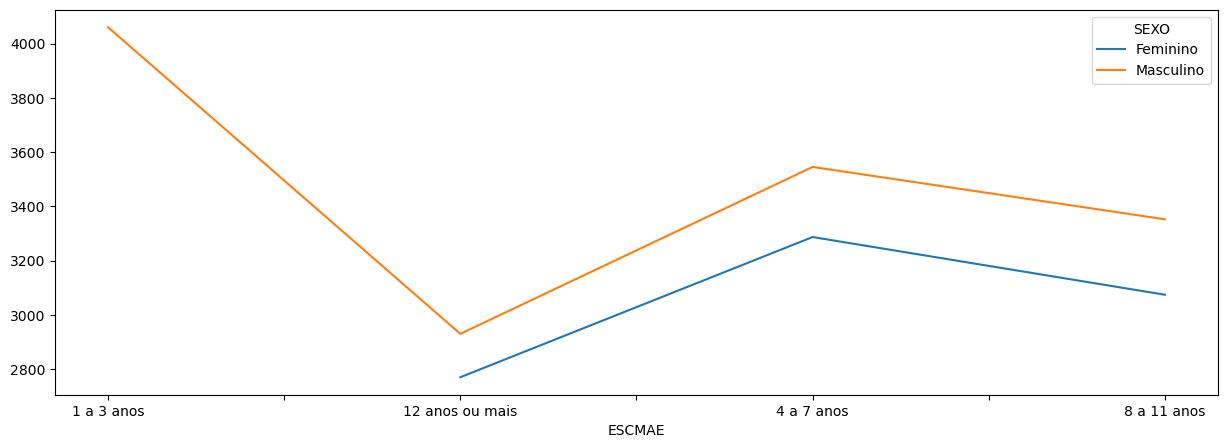

In [12]:
#Plotei o gráfico para melhor visualizaçao dos resultados:
esc_mae.groupby(['ESCMAE', 'SEXO'])['PESO'].mean().unstack().plot(figsize=[15,5]);

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [13]:
#O municipio que nasceu menos bebe em 2019 foi Castanheiras(desconsiderando o Municipio ignorado de RO):
sinasc_1['munResNome'].value_counts(ascending = True)[:6]

Município ignorado - RO     1
Castanheiras               32
Pimenteiras do Oeste       40
Primavera de Rondônia      43
Parecis                    44
Rio Crespo                 50
Name: munResNome, dtype: int64

In [14]:
#Criei uma variavel que filtra os dados desse municipio:
castanheiras = sinasc_1[sinasc_1['munResNome'] == 'Castanheiras']
castanheiras.head()

,munResNome,IDADEMAE,IDADEPAI,PESO,ESCMAE,DTNASC,SEXO
2067,Castanheiras,18,17.0,2900,8 a 11 anos,2019-05-23,Feminino
2300,Castanheiras,31,36.0,3325,8 a 11 anos,2019-06-21,Masculino
4512,Castanheiras,22,NaN,2280,8 a 11 anos,2019-05-25,Feminino
5881,Castanheiras,26,24.0,3370,8 a 11 anos,2019-05-07,Masculino
5952,Castanheiras,32,29.0,2685,12 anos ou mais,2019-06-21,Feminino


In [15]:
#- qual a idade media, maxima, minima das maes nesse municipio de Castanheiras? 
castanheiras.agg({'IDADEMAE':['mean', 'max', 'min']})
                       

,IDADEMAE
mean,27.28125
max,39.00000
min,17.00000


In [16]:
#- qual a idade media, maxima, minima dos pais nesse municipio?
castanheiras.agg({'IDADEPAI':['mean', 'max', 'min']})


,IDADEPAI
mean,30.392857
max,43.000000
min,17.000000


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [17]:
# Primeiro analisei os dados gerais dos Municipios:
sinasc_raw['munResNome'].value_counts(ascending = False)

Porto Velho                  8437
Ji-Paraná                    2182
Ariquemes                    1729
Vilhena                      1590
Cacoal                       1374
Rolim de Moura                927
Jaru                          881
Guajará-Mirim                 781
Ouro Preto do Oeste           631
Pimenta Bueno                 616
Buritis                       583
Machadinho D'Oeste            500
Espigão D'Oeste               450
Nova Mamoré                   432
Alta Floresta D'Oeste         367
São Miguel do Guaporé         353
Candeias do Jamari            337
Presidente Médici             304
São Francisco do Guaporé      303
Nova Brasilândia D'Oeste      261
Cerejeiras                    237
Costa Marques                 233
Alto Paraíso                  226
Colorado do Oeste             214
Alvorada D'Oeste              205
Cujubim                       205
Monte Negro                   199
Urupá                         170
Seringueiras                  168
Campo Novo de 

In [18]:
# Criei um dataframe apenas com mes Marco

mes_marco = sinasc_1[(sinasc_1['DTNASC']>= '2019-03-01') & (sinasc_1['DTNASC']<= '2019-03-31')]
mes_marco.head()

,munResNome,IDADEMAE,IDADEPAI,PESO,ESCMAE,DTNASC,SEXO
3,Alto Alegre dos Parecis,30,24.0,2982,12 anos ou mais,2019-03-20,Feminino
4,Alta Floresta D'Oeste,30,27.0,3310,8 a 11 anos,2019-03-23,Feminino
5,Alta Floresta D'Oeste,33,40.0,2740,1 a 3 anos,2019-03-27,Masculino
9,Alta Floresta D'Oeste,30,41.0,3900,1 a 3 anos,2019-03-11,Feminino
10,Alta Floresta D'Oeste,31,28.0,3590,8 a 11 anos,2019-03-11,Feminino


In [19]:
#O municipio que nasceu mais bebe no mes de março foi: Porto Velho
mes_marco['munResNome'].value_counts(ascending = False)[:1]

Porto Velho    744
Name: munResNome, dtype: int64

In [20]:
#- qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
porto_velho = sinasc_raw[sinasc_raw['munResNome'] == 'Porto Velho']
porto_velho.agg({'QTDFILVIVO':['mean', 'max', 'min']})

,QTDFILVIVO
mean,1.167236
max,12.000000
min,0.000000


In [21]:
#- qual a idade media, maxima, minima dos pais nesse municipio?
porto_velho.agg({'IDADEMAE': ['mean','min','max'], 'IDADEPAI':['mean','min','max']})

,IDADEMAE,IDADEPAI
mean,26.31267,32.352679
min,12.00000,16.000000
max,47.00000,65.000000


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [22]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [23]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [24]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [25]:
#'PARTO': Tipo de parto (normal, cesárea)
sinasc_raw.PARTO.value_counts()

Cesáreo    18036
Vaginal     8943
Name: PARTO, dtype: int64

### Análise da variável "Gestacao"

In [26]:
#'GESTACAO': Tempo de gestação em semanas.
sinasc_raw.GESTACAO.value_counts()

37 a 41 semanas        22589
32 a 36 semanas         2249
42 semanas e mais        700
28 a 31 semanas          165
22 a 27 semanas           86
Menos de 22 semanas        7
Name: GESTACAO, dtype: int64

In [27]:
# Percebi que a quantidade de bebes nascidos por tempo de gestacao possui valores muito proximos no sexo Feminino e Masculino.
sinasc_raw.groupby(['GESTACAO','SEXO'])['IDADEMAE'].count().unstack()

SEXO,Feminino,Masculino
GESTACAO,,
22 a 27 semanas,45,41
28 a 31 semanas,81,84
32 a 36 semanas,1053,1195
37 a 41 semanas,11021,11565
42 semanas e mais,332,368
Menos de 22 semanas,6,1


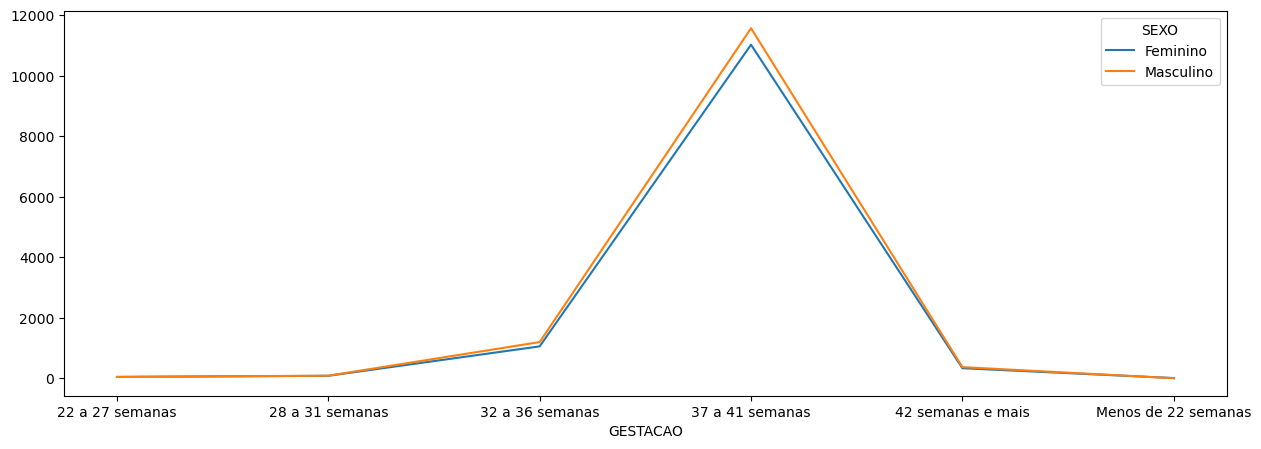

In [28]:
sinasc_raw.groupby(['GESTACAO','SEXO'])['IDADEMAE'].count().unstack().plot(figsize=[15,5]);

In [29]:
# A media do peso dos bebes dos dois sexos também se mantém no mesmo padrao, exceto na faixa de "Menos de 22 semanas" que possui uma diferenca do peso feminino em menos de 25% aproximadamente ao peso medio masculino.
sinasc_raw.groupby(['GESTACAO', 'SEXO'])['PESO'].mean().unstack()

SEXO,Feminino,Masculino
GESTACAO,,
22 a 27 semanas,1157.666667,1226.439024
28 a 31 semanas,1734.222222,1666.750000
32 a 36 semanas,2627.598291,2764.774895
37 a 41 semanas,3251.586698,3373.804669
42 semanas e mais,3314.201807,3455.576087
Menos de 22 semanas,1869.166667,2435.000000


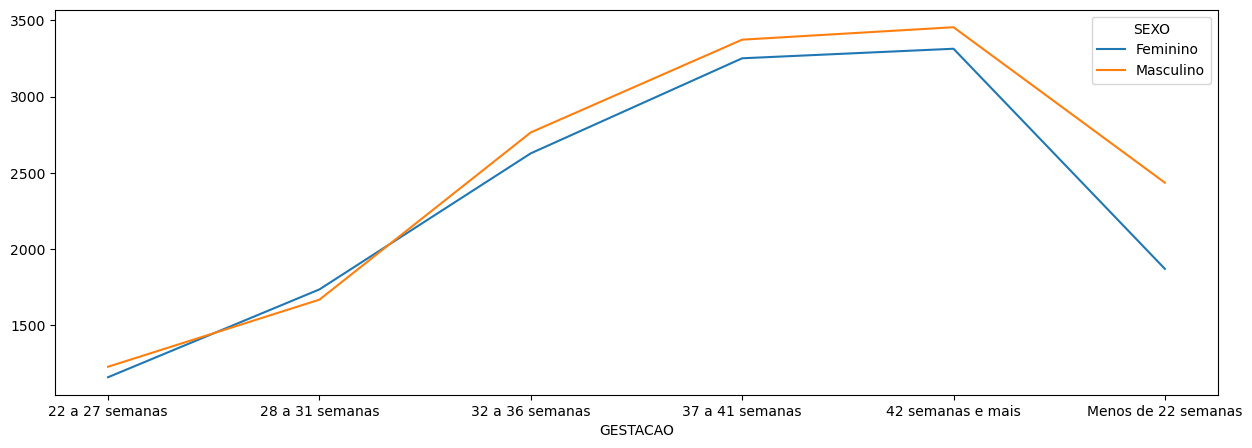

In [30]:
sinasc_raw.groupby(['GESTACAO', 'SEXO'])['PESO'].mean().unstack().plot(figsize=[15,5]);

In [31]:
#'GRAVIDEZ': Número de gravidez
sinasc_raw.GRAVIDEZ.value_counts()

Única              26452
Dupla                492
Tríplice e mais        5
Name: GRAVIDEZ, dtype: int64

In [32]:
# Aqui podemos observar que 82,5% dos nascimentos são de gravidez "única" com gestação na faixa de "37 a 41 semanas":
sinasc_raw.groupby(['GESTACAO','GRAVIDEZ'])['IDADEMAE'].count().unstack()

GRAVIDEZ,Dupla,Tríplice e mais,Única
GESTACAO,,,
22 a 27 semanas,15.0,NaN,71.0
28 a 31 semanas,20.0,NaN,145.0
32 a 36 semanas,218.0,3.0,2020.0
37 a 41 semanas,210.0,2.0,22322.0
42 semanas e mais,2.0,NaN,698.0
Menos de 22 semanas,NaN,NaN,7.0


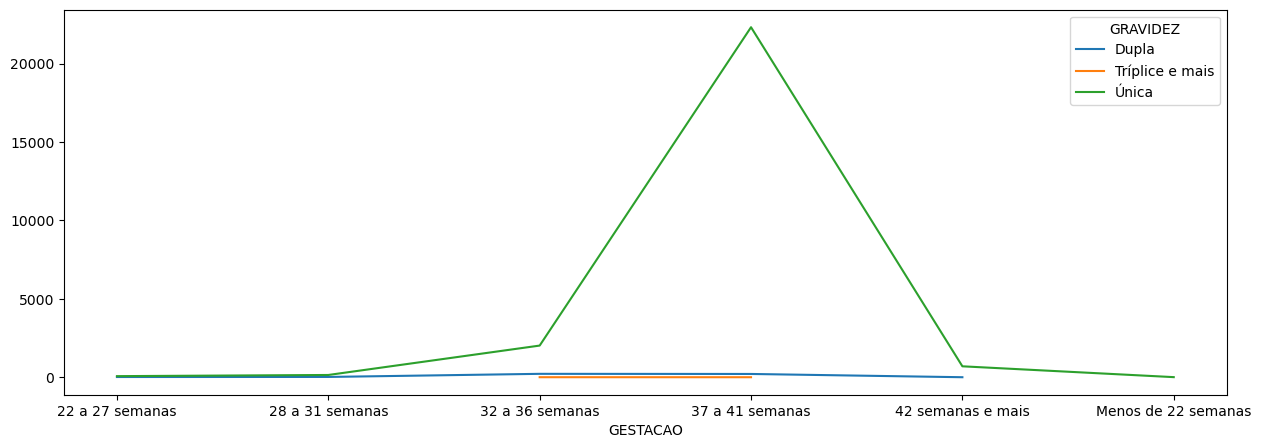

In [33]:
sinasc_raw.groupby(['GESTACAO','GRAVIDEZ'])['IDADEMAE'].count().unstack().plot(figsize=[15,5]);

In [34]:
sinasc_raw.shape

(27028, 69)

GESTACAO         22 a 27 semanas  28 a 31 semanas  32 a 36 semanas  \
GRAVIDEZ                                                             
Dupla                         15               20              218   
Tríplice e mais                0                0                3   
Única                         71              145             2020   

GESTACAO         37 a 41 semanas  42 semanas e mais  Menos de 22 semanas  
GRAVIDEZ                                                                  
Dupla                        210                  2                    0  
Tríplice e mais                2                  0                    0  
Única                      22322                698                    7  
GRAVIDEZ
Dupla                465
Tríplice e mais        5
Única              25263
dtype: int64
GESTACAO         22 a 27 semanas  28 a 31 semanas  32 a 36 semanas  \
GRAVIDEZ                                                             
Dupla                   0.032258     

<Axes: xlabel='GRAVIDEZ'>

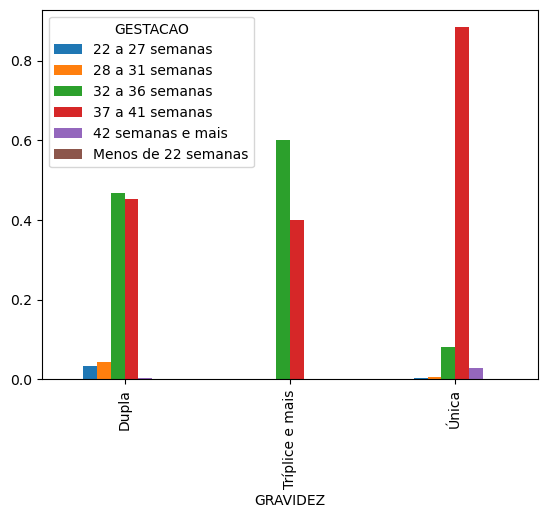

In [35]:
# Aqui podemos observar o percentual de gravidez por gestação:
freq = pd.crosstab(sinasc_raw['GRAVIDEZ'], sinasc_raw['GESTACAO'])
print(freq)
print(freq.sum(1))

freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
print(freq_pctlin)

freq_pctlin.plot.bar()


In [36]:
# Analise de quantidade por tipo de parto
sinasc_raw.PARTO.value_counts()

Cesáreo    18036
Vaginal     8943
Name: PARTO, dtype: int64

In [37]:
# Analise de Gestacao x Tipo de Parto
sinasc_raw.groupby('GESTACAO')['PARTO'].value_counts().unstack()

PARTO,Cesáreo,Vaginal
GESTACAO,,
22 a 27 semanas,23,62
28 a 31 semanas,90,75
32 a 36 semanas,1486,758
37 a 41 semanas,15199,7358
42 semanas e mais,408,292
Menos de 22 semanas,3,4


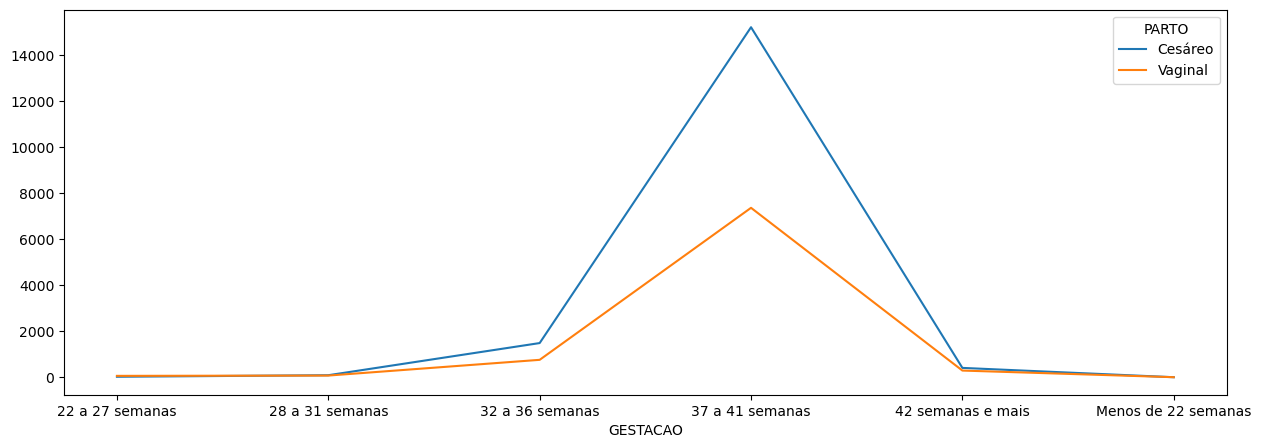

In [38]:
#Podemos observar que a partir de 31 semanas de gestação, o tipo de parto Cesareo equivale a praticamente o dobro do parto Vaginal:
sinasc_raw.groupby('GESTACAO')['PARTO'].value_counts().unstack().plot(figsize=[15,5]);

## Conclusão de Análises:

### Escolaridade da Mãe:
 - Na faixa de '1 a 3 anos' de escolaridade da mãe teve a media de peso dos nascidos mais ALTA: 4,060 Kgs;
 - Na faixa de '12 anos ou mais' de escolaridade da mãe teve a media de peso dos nascidos mais BAIXA: 2,873.47 Kgs;
 
### Municipios:
 - O municipio onde nasceram MENOS bebês foi Castanheira: 32. A idade media da mãe nesse município é 27.28 e do pai 30.39;
 - O municipio onde nasceram MAIS bebês foi Porto Velho: 8437. A idade media da mãe nesse município é 26.31 e do pai 32.35;
 
### Gestação:
 - Os nascidos em tempo de Gestação 37 a 41 semanas somam 22589, que significam 83,6% do total.
 - Nesse mesmo período, o tipo de parto Cesareo equivale a praticamente o dobro do parto Vaginal: 15.199 Cesareos e 7.358 Normais.
 - Além disso, 99% dos nascimentos são de gravidez "única"e apenas 1% 'dupla'.
 - O sexo Feminino e Masculino tem a mesma proporção de nascimentos.